In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import pandas as pd
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
def load_result(file_path):
    with open(file_path, 'r') as f:
        # read last line and grab metrics info as a dict
        result = ast.literal_eval(f.readlines()[-1].split('[INFO] ')[1])

    return result
'''
    results_path: path to dir containing LAVIS output files
'''
def load_results(results_path):
    
    gather = []
    for file_name in os.listdir(results_path):
        file_path = os.path.join(results_path, file_name)
        result = load_result(file_path)
        result['file_name'] = file_name
        gather.append(result)
    
    df_results = pd.DataFrame(gather)
    
    weight_bits = df_results.file_name.str.extract(r'w(\d*)')
    df_results['weight_bits'] = [float(x) if x != '158' else 1.58 for x in weight_bits[0]]
    
    act_bits = df_results.file_name.str.extract(r'a(\d*)')
    df_results['activation_bits'] = [float(x) if x != '158' else 1.58 for x in act_bits[0]]

    return df_results

In [85]:
baseline_result = load_result(os.path.join('..', 'results', 'blip2_flickr', 'blip2_flickr_baseline.2714895'))
baseline_result['file_name'] = 'baseline'
baseline_result['weight_bits'] = 32.0
baseline_result['activation_bits'] = 32.0

baseline_result = pd.DataFrame([baseline_result])
baseline_result

,txt_r1,txt_r5,txt_r10,txt_r_mean,img_r1,img_r5,img_r10,img_r_mean,r_mean,agg_metrics,file_name,weight_bits,activation_bits
0,97.6,100.0,100.0,99.2,89.74,98.18,98.94,95.62,97.41,99.2,baseline,32.0,32.0


## Uniform Quantization

+ https://pocketflow.github.io/uq_learner/#algorithm

In [77]:
results_path = os.path.join('..', 'results', 'blip2_flickr', 'uniform_quant', 'vision_attention_head')
results_path

'../results/blip2_flickr/uniform_quant/vision_attention_head'

In [87]:
df_results = load_results(results_path)

df_results = pd.concat([baseline_result, df_results], axis = 0)
df_results

,txt_r1,txt_r5,txt_r10,txt_r_mean,img_r1,img_r5,img_r10,img_r_mean,r_mean,agg_metrics,file_name,weight_bits,activation_bits
0,97.6,100.0,100.0,99.200000,89.74,98.18,98.94,95.620000,97.410000,99.200000,baseline,32.00,32.0
0,52.7,70.2,76.1,66.333333,47.20,67.50,74.72,63.140000,64.736667,66.333333,vit_w4_a32,4.00,32.0
1,54.2,71.5,78.2,67.966667,49.04,69.46,76.70,65.066667,66.516667,67.966667,vit_w6_a32,6.00,32.0
2,18.0,30.4,37.8,28.733333,19.14,34.06,41.46,31.553333,30.143333,28.733333,vit_w2_a32,2.00,32.0
3,58.0,76.6,83.0,72.533333,56.70,76.12,81.72,71.513333,72.023333,72.533333,vit_w158_a32,1.58,32.0
4,55.2,72.2,78.1,68.500000,49.52,70.14,77.38,65.680000,67.090000,68.500000,vit_w8_a32,8.00,32.0


Text(0, 0.5, 'R@1')

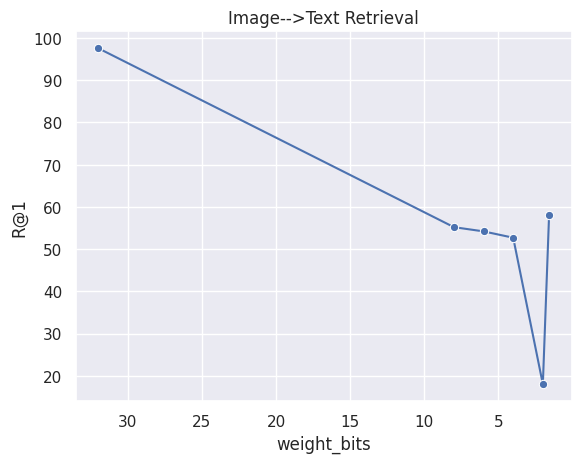

In [93]:
sns.set_theme()
ax = sns.lineplot(data= df_results,
                  x = 'weight_bits',
                  y = 'txt_r1',
                  marker = 'o')

ax.invert_xaxis()
plt.title('Image-->Text Retrieval')
plt.ylabel('R@1')


Text(0, 0.5, 'R@1')

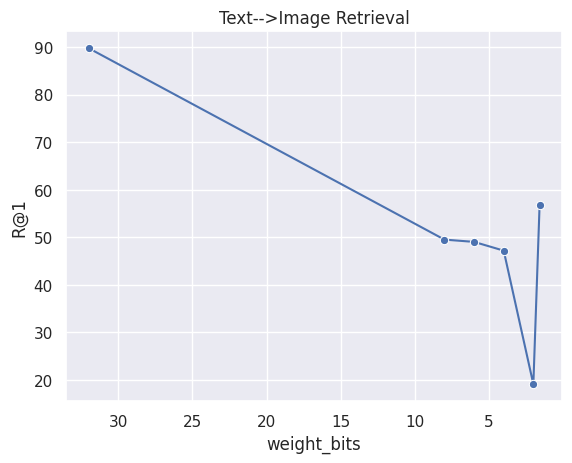

In [94]:
sns.set_theme()
ax = sns.lineplot(data= df_results,
                  x = 'weight_bits',
                  y = 'img_r1',
                  marker = 'o')

ax.invert_xaxis()
plt.title('Text-->Image Retrieval')
plt.ylabel('R@1')
